In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
S = np.array([1,3,1])

In [4]:
ES = np.exp(S)
ES

array([ 2.71828183, 20.08553692,  2.71828183])

In [5]:
ES/ES.sum()

array([0.10650698, 0.78698604, 0.10650698])

In [6]:
def sigmoid(x):
    ex = np.exp(x)
    return ex/(1+ex)

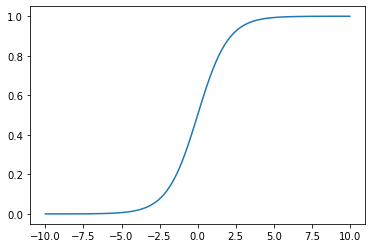

In [8]:
X = np.linspace(-10, 10, 101)
plt.plot(X, sigmoid(X));

In [10]:
x1 = np.linspace(0, 10, 101)
x2 = np.linspace(10, 20, 101)
X1, X2 = np.meshgrid(x1, x2)

In [21]:
w1, w2, b = (1, 2, -35)
S = w1*X1+w2*X2+b

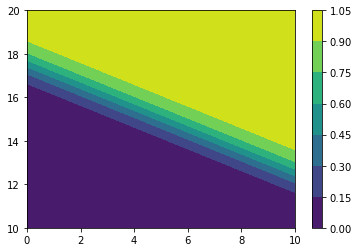

In [22]:
Y = sigmoid(S)
plt.contourf(X1, X2, Y)
plt.colorbar()


In [23]:
Data = np.array([
    [1,1,1],
    [2,2,1],
    [-3, -4, 0],
    [-2, -1, 0]
])

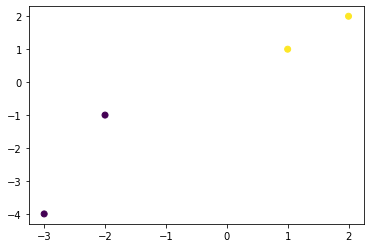

In [32]:
plt.scatter(Data[:,0], Data[:,1], c=Data[:,2], cmap='viridis');

In [47]:
def Loss(w1, w2, b):
    S = w1*Data[:,0]+w2*Data[:,1]+b
    Yhat = sigmoid(S)
    Y = Data[:,2]
    l1 = Y*np.log(Yhat)
    l2 = (1-Y)*np.log(1-Yhat)
    l = -(l1+l2)
    return l.sum()/len(l)
Loss(0.3, 0.4, 1)

0.2872956600207283

In [48]:
def gradient_3(L):
    delta = 0.001
    def j(x1, x2, x3):
        Lx = L(x1, x2, x3)
        j1 = (L(x1+delta, x2, x3) - Lx)/delta
        j2 = (L(x1, x2+delta, x3) - Lx)/delta
        j3 = (L(x1, x2, x3+delta) - Lx)/delta

        return j1, j2, j3

    return j    

In [49]:
J = gradient_3(Loss)

In [50]:
J(0.3, 0.4, 1)

(-0.46667469591893385, -0.38724446971899473, 0.11127263899407547)

In [53]:
def gradient_decent(L, w1, w2, b):
    theta = np.array((w1, w2, b))
    J = gradient_3(L)
    step = 0.05
    for i in range(100):
        j = J(*theta)
        theta -= step*np.array(j)
        print(theta)

In [54]:
gradient_decent(Loss, 0.3, 0.4, 1)

[0.32333373 0.41936222 0.99443637]
[0.34519947 0.43720916 0.98923461]
[0.36578244 0.45375363 0.98435103]
[0.38523564 0.46916969 0.97974923]
[0.40368644 0.48360064 0.97539869]
[0.42124165 0.49716536 0.97127367]
[0.43799163 0.50996327 0.96735229]
[0.45401335 0.52207806 0.96361582]
[0.46937293 0.53358081 0.96004812]
[0.48412753 0.54453221 0.95663517]
[0.49832693 0.55498449 0.9533647 ]
[0.51201472 0.56498286 0.95022595]
[0.52522932 0.57456669 0.94720938]
[0.53800478 0.58377046 0.94430651]
[0.5503714  0.59262449 0.94150977]
[0.56235631 0.60115563 0.93881234]
[0.57398388 0.60938772 0.9362081 ]
[0.58527611 0.61734205 0.93369148]
[0.59625291 0.62503767 0.93125742]
[0.60693241 0.63249172 0.92890132]
[0.61733112 0.6397197  0.92661896]
[0.62746415 0.64673561 0.92440645]
[0.63734539 0.65355218 0.92226022]
[0.64698759 0.66018101 0.920177  ]
[0.65640252 0.66663272 0.91815372]
[0.66560109 0.672917   0.91618755]
[0.67459337 0.67904279 0.91427587]
[0.68338875 0.6850183  0.91241623]
[0.69199596 0.690851